In [2]:
#!pip install pandas

In [3]:
#!pip install yfinance

In [4]:
#!pip install mplfinance

In [41]:
import pandas as pd

In [42]:
import yfinance as yf

In [43]:
import mplfinance as flp

In [44]:
data = yf.download("goog", start="2021-01-01", end="2022-10-04",period="1d")

[*********************100%***********************]  1 of 1 completed


In [45]:
df_data=pd.DataFrame(data)


In [46]:
print(df_data.head(5))

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-01-04  87.876999  88.032501  85.392502  86.412003  86.412003  38038000
2021-01-05  86.250000  87.383499  85.900749  87.045998  87.045998  22906000
2021-01-06  85.131500  87.400002  84.949997  86.764503  86.764503  52042000
2021-01-07  87.002998  89.419998  86.852501  89.362503  89.362503  45300000
2021-01-08  89.399002  90.491997  88.676750  90.360497  90.360497  41012000


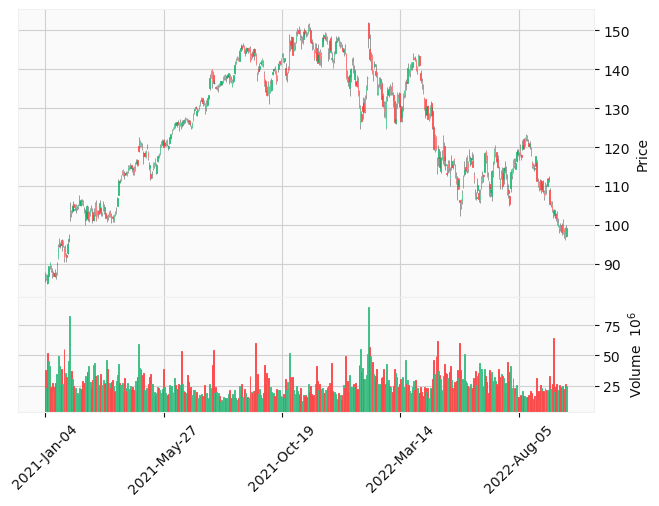

In [47]:
flp.plot(df_data,type='candle',volume=True,style='yahoo')

In [48]:
#We create a (simples) Movings Averages for owr system, taking High and Low values

In [49]:
MA_high=df_data["Close"].rolling(window=5).mean()

In [50]:
MA_low=df_data["Close"].rolling(window=20).mean()

In [51]:
#then we need to agree MAVs to the original DataFrame

In [52]:
df_data['MA_High']=MA_high

In [53]:
df_data['MA_Low']=MA_low

In [54]:
#Now we can see how looks owr chart, with MAVs

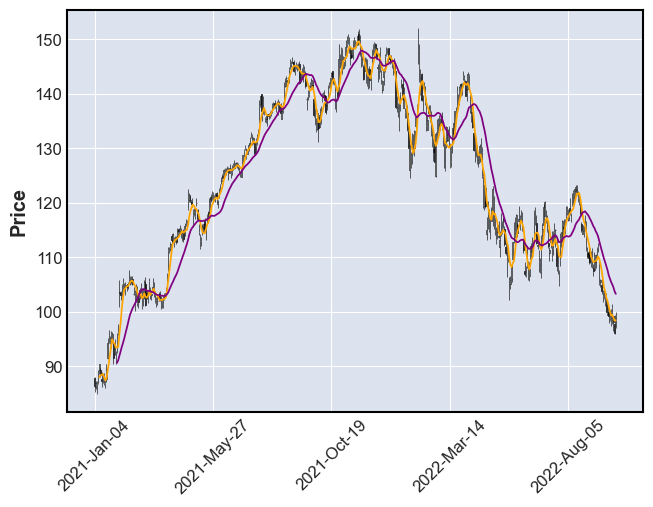

In [55]:
two_mav=[
    flp.make_addplot(df_data['MA_High'],color="orange"),
    flp.make_addplot(df_data['MA_Low'],color="purple"),
        ]
flp.plot(df_data,type='candle',addplot=two_mav)


In [56]:
#Now we need to find the points (index and price), in which we will should buy or sell

In [57]:
#df_data.iloc[0]

In [58]:
BUY_DF=[]
SELL_DF=[]
for index in range(len(df_data['MA_High'])):


    #BUY_SIGNAL
    if df_data.iloc[index-1]['MA_Low']>df_data.iloc[index-1]['MA_High'] and df_data.iloc[index]['MA_Low']<df_data.iloc[index]['MA_High']:
        BUY_DF.append(df_data.iloc[index]["Close"])
    else:
        BUY_DF.append(None)
          
    #SELL_SIGNAL
    if df_data.iloc[index-1]['MA_Low']<df_data.iloc[index-1]['MA_High'] and df_data.iloc[index]['MA_Low']>df_data.iloc[index]['MA_High']:    
        SELL_DF.append(df_data.iloc[index]["Close"])
    else:
        SELL_DF.append(None)   

In [59]:
df_data['Buy']=BUY_DF


In [60]:
df_data['Sell']=SELL_DF

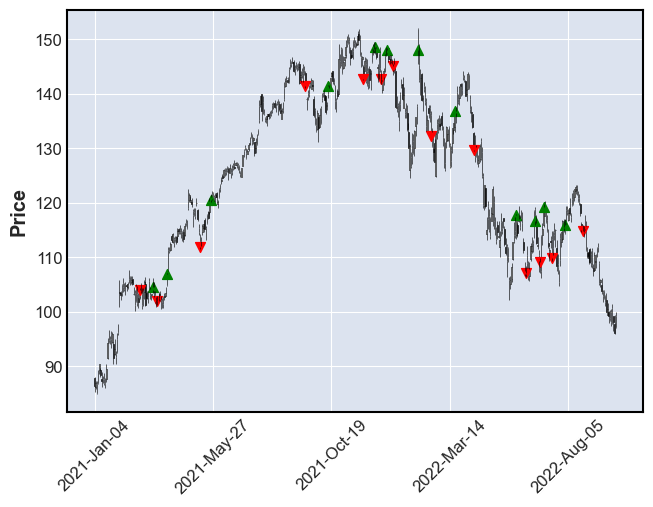

In [61]:
signals=[
    #flp.make_addplot(df_data['MA_High'],color="orange"),
    #flp.make_addplot(df_data['MA_Low'],color="purple"),
    flp.make_addplot(df_data['Buy'], type='scatter', marker='^', markersize=50, color='g'),
    flp.make_addplot(df_data['Sell'], type='scatter', marker='v', markersize=50, color='r'),
        ]
flp.plot(df_data,type='candle',addplot=signals)
